In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

## Load Data & Visualize

In [48]:
def cal_stats(y_pred, y, window_size):
    # Reshape Prediction
    window_num = 10980//window_size+1
    y_pred = y_pred.reshape(-1,window_num,window_size,window_size)
    y_pred = np.swapaxes(y_pred, 1, 2)
    y_pred = y_pred.reshape(-1,window_num*window_size)
    y_pred = y_pred[:y.shape[0], :y.shape[1]]
    y_err = y - y_pred
    return y_pred, y_err

def visualize(y_pred, y, y_err, PRED_PATH):
    # Hist
    plt.hist(y[y>-1.0])
    plt.ylabel("Frequency")
    plt.xlabel("Pixel values in Ground Truth")
    plt.title("Distribution of pixel values in Ground Truth")
    plt.savefig(PRED_PATH[:-5]+"-gthist.pdf", bbox_inches="tight")
    plt.show()
    
    plt.hist(y_pred[y_pred>-1.0])
    plt.ylabel("Frequency")
    plt.xlabel("Pixel values in Prediction")
    plt.title("Distribution of pixel values in Prediction")
    plt.savefig(PRED_PATH[:-5]+"predhist.pdf", bbox_inches="tight")
    plt.show()
    
    # Visualize Ground Truth and Prediction
    nodata_mask = y <= -1.0
    data = np.ma.masked_where(nodata_mask, y)
    data_pred = np.ma.masked_where(nodata_mask, y_pred)
    data_err = np.ma.masked_where(nodata_mask, y_err)

    fig, axes = plt.subplots(1,3, figsize=(45,15))
    cbar = axes[0].imshow(data, vmin=0., vmax=60.0)
    axes[0].set_title(f"img {IMGIDX} - ground truth", fontsize=30)
    pred_cbar = axes[1].imshow(data_pred, vmin=0., vmax=0.8)
    axes[1].set_title(f"img {IMGIDX} - prediction", fontsize=30)
    err_cbar = axes[2].imshow(data_err, cmap="RdYlBu", vmin=-60., vmax=60.)
    axes[2].set_title(f"img {IMGIDX} - error", fontsize=30)
    err_cbar_ax = fig.add_axes([0.92, 0.2, 0.01, 0.6])
    cbar_ax = fig.add_axes([0.08, 0.2, 0.01, 0.6])
    pred_cbar_ax = fig.add_axes([0.63, 0.2, 0.01, 0.6])
    fig.colorbar(cbar, cax=cbar_ax)
    fig.colorbar(err_cbar, cax=err_cbar_ax)
    fig.colorbar(pred_cbar, cax=pred_cbar_ax)
    plt.savefig(PRED_PATH[:-4]+"pdf", bbox_inches="tight")
    plt.show()

Prediction shape:  (471969, 16, 16)


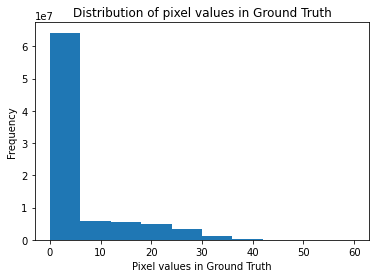

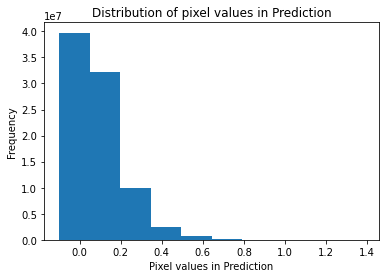

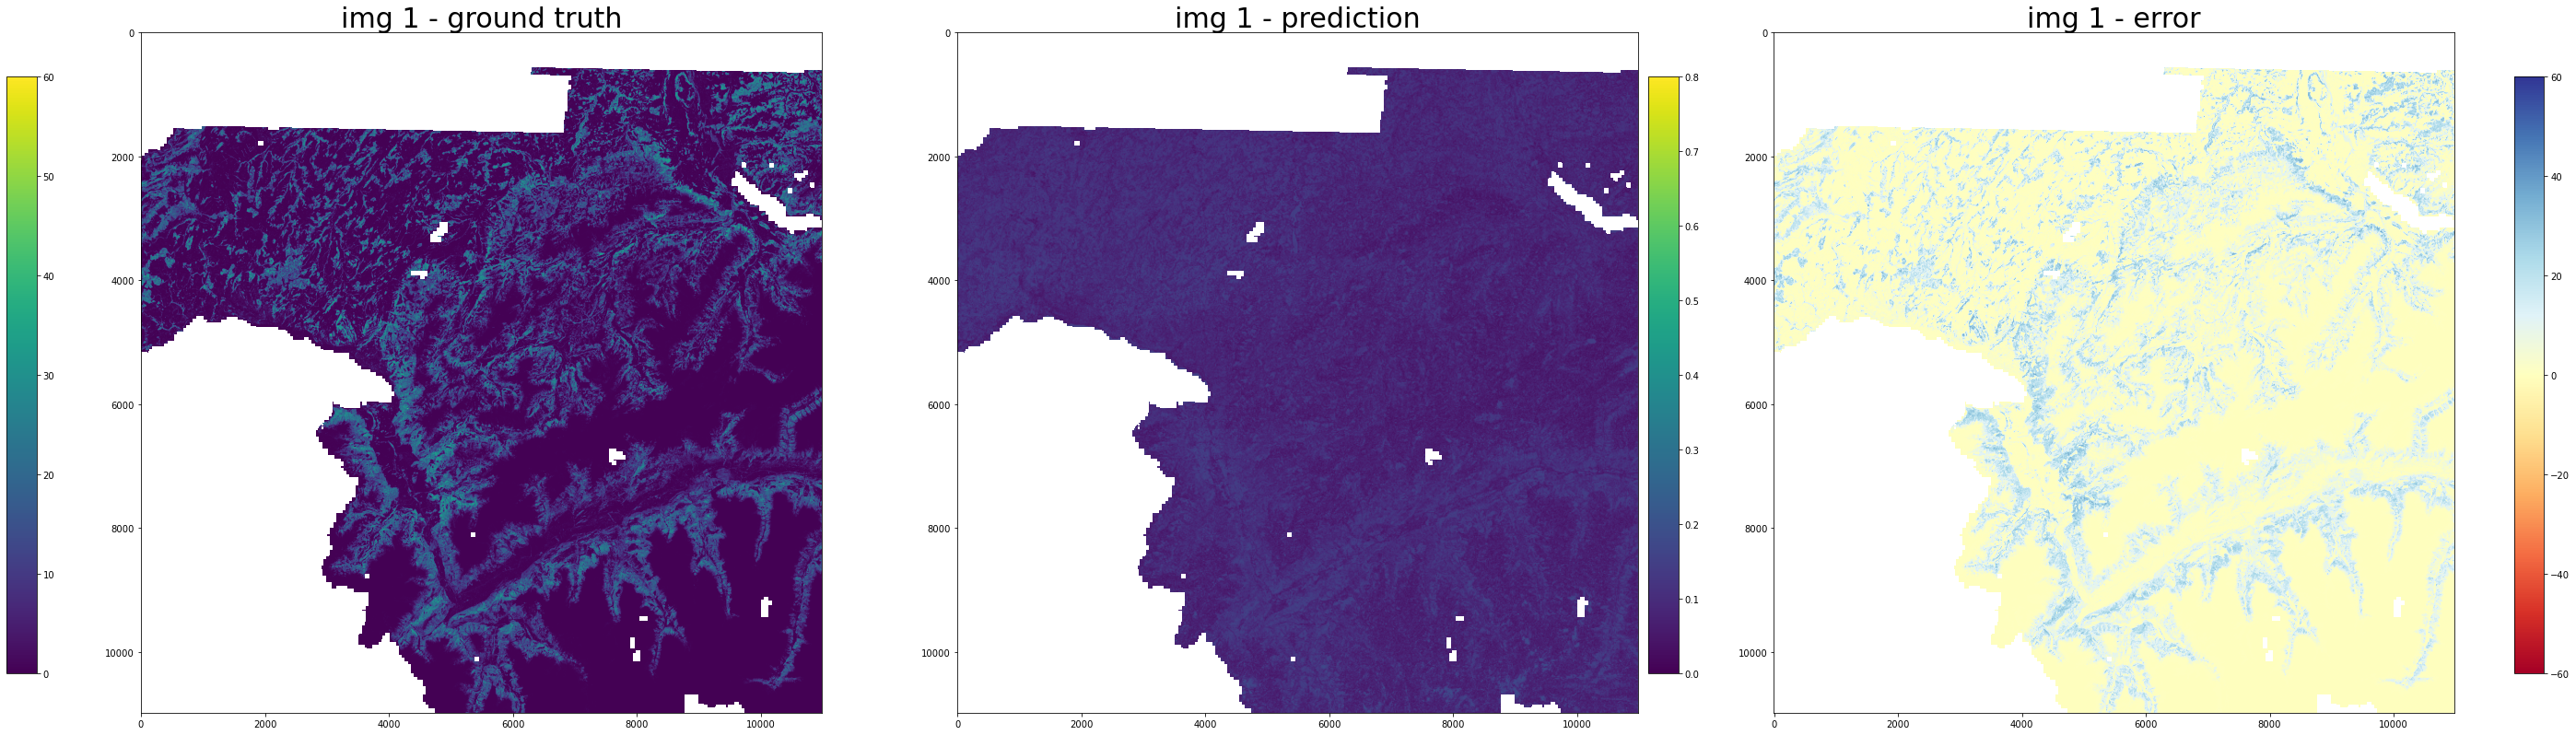

9.726394045469798


In [49]:
# Load Prediction
regressor = "SGD"
FEATURE_NUM = 8
window_size = 16 #224
y_err_all = []
for i in range(1):
    IMGIDX = i+1
    PRED_PATH = f"../result/update/c{FEATURE_NUM}_v3/PartialFit{regressor}_last-data_test_c{FEATURE_NUM}_p{IMGIDX}_new.hdf5"
#     PRED_PATH = f"D:/jingyli/ImageInterpretation_Regression/result/checkpoints{FEATURE_NUM}/PartialFit{regressor}_last-data_test_features_c{FEATURE_NUM}_pic{IMGIDX}.hdf5"
    pred_dset = h5py.File(PRED_PATH,"r")
    y_pred = np.array(pred_dset["prediction_dataset"])
    print("Prediction shape: ", y_pred.shape)

    # Load Ground Truth
    af_dset = h5py.File("../data/dataset_rgb_nir_test.hdf5","r")
    af_dset["GT"].shape
    y = af_dset["GT"][i]

    # Evaluation
    y_pred, y_err = cal_stats(y_pred, y, window_size)
    y_err_all.append(np.sqrt(np.mean(np.power(y_err[y!=-1],2))))

    # Visualize
    visualize(y_pred, y, y_err, PRED_PATH)
    

print(np.mean(y_err_all))